## Observations and Insights

In [ ]:
# OBSERVATIONS:
# 1. There is a strong positive correlation (.84) between average tumor size and mouse weight.
#    The heavier the mouse, the larger its tumor will likely be.
# 2. There were more Capomulin and Ramicane tests than test of other drugs. 
# 3. Mouse x401 experinced a periods of rapid tumor shinking, followed by small upticks in volume.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
drug_data = merged_data.groupby("Drug Regimen")
tumor_mean = drug_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_data["Tumor Volume (mm3)"].median()
tumor_var = drug_data["Tumor Volume (mm3)"].var()
tumor_std = drug_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

# Create new DF of summary data and display
summary = pd.DataFrame({"Tumor Volume Mean":tumor_mean,
                        "Tumor Volume Median":tumor_median,
                        "Tumor Volume Variance":tumor_var,
                        "Tumor Volume standard deviation":tumor_std, 
                        "Tumor Volume SEM":tumor_sem
                       })
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume standard deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

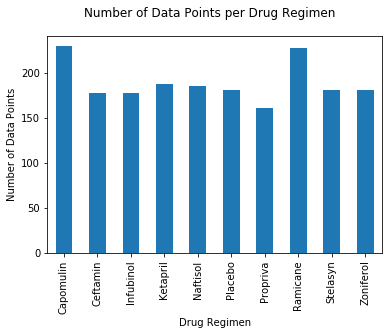

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Create series of the size of each drug regimen
drug_datapoints = drug_data.size()

# Plot the series as a bar graph 
drug_bar = drug_datapoints.plot(kind='bar')
plt.ylabel("Number of Data Points")
plt.suptitle("Number of Data Points per Drug Regimen")
drug_bar

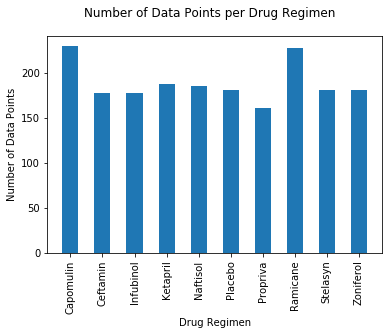

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Create list of all drugs to be used as x ticks
drugs = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol',
         'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Get number of x values using Numpy
x_axis = np.arange(len(drugs))

# Create bar graph with x_axis and drug size series and format
plt.bar(x_axis,drug_datapoints,width=.5)

# Replace x value number with corresponding number in 'drugs' list
plt.xticks(x_axis,drugs,rotation=90)

# Label x and y axis and give graph a title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.suptitle("Number of Data Points per Drug Regimen")

# Display graph
plt.show()

## Pie plots

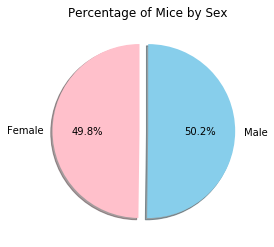

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Drop rows with repeated Mouse ID
# Removed because mouse_metadata already has this information
# mice = merged_data.drop_duplicates(subset=["Mouse ID"], keep='first')

# Create formatting - colors and which slice to explode
explode = (0.1, 0) 
colors= ["pink","skyblue"]

# Make new series by grouping new DF by 'Sex' and calculating the how many of each using the size() function
mice_sex = mouse_metadata.groupby("Sex").size()

# Plot the series as a pir chart using Pandas, setting most formatting in one line
mice_chart = mice_sex.plot(kind="pie",autopct='%1.1f%%',explode=explode,shadow=True,startangle=90,colors=colors)
plt.title("Percentage of Mice by Sex")
plt.ylabel("")

# Display chart
mice_chart

Text(0.5, 1.0, 'Percentage of Mice by Sex')

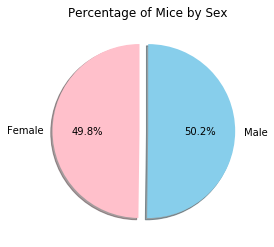

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels
labels = "Female","Male"

# Using label and formatting information, plot the 'mice_sex' series using matplotlib
plt.pie(mice_sex, explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title("Percentage of Mice by Sex")

In [8]:
# A reference for drug names so I don't have to scroll up
merged_data["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens ... 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Create a list of the most promising drug regimens
best_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create new DF pulling rows from the 'merged_data' with a the maximum (final) 'Timepoint'
final_tumor_data = merged_data.loc[merged_data["Timepoint"]==45]

# Drop all drug regimens that aren't the four best 
# There's a much better way to do this .....
final_tumor_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] != "Placebo"]
final_tumor_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] != "Stelasyn"]
final_tumor_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] != "Zoniferol"]
final_tumor_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] != "Ketapril"]
final_tumor_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] != "Propriva"]
final_tumor_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] != "Naftisol"]

# Set the DF's index to Mouse ID
# final_tumor_data = final_tumor_data.set_index("Drug Regimen")

# Create a series of final tumor volumes
final_tumor = final_tumor_data["Tumor Volume (mm3)"]

# Calculate the quartiles and IQR and quantitatively ...
# determine if there are any potential outliers across all four treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Set quantile range
quartiles = final_tumor.quantile([.25,.5,.75])

# Set lower quantile
lq = quartiles[0.25]

# Set upper quantile
uq = quartiles[0.75]

# Caluculate interquartile range by subtracting lower quantile from upper
iqr = uq-lq

# Disply quantile information 
print(f"The lower quartile of Final Tumor Volume is: {round(lq,3)}")
print(f"The upper quartile of Final Tumor Volume is: {round(uq,3)}")
print(f"The interquartile range of Final Tumor Volume is: {round(iqr,3)}")
print(f"The the median of Final Tumor Volume is: {round(quartiles[0.5],3)}")

# Calculate the lower/upper bounds and display information
lower_bound = lq - (1.5*iqr)
upper_bound = uq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")

The lower quartile of Final Tumor Volume is: 33.48
The upper quartile of Final Tumor Volume is: 62.142
The interquartile range of Final Tumor Volume is: 28.662
The the median of Final Tumor Volume is: 40.159
Values below -9.513 could be outliers.
Values above 105.135 could be outliers.


Text(0.5, 1.0, '')

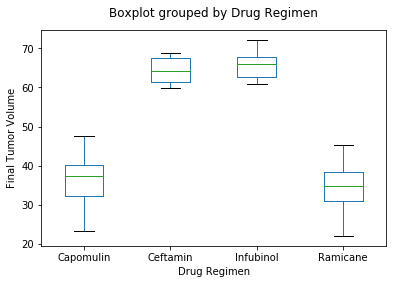

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = final_tumor_data.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)'], grid=False)
plt.ylabel("Final Tumor Volume")
plt.title('')

## Line and scatter plots

(25, 46)

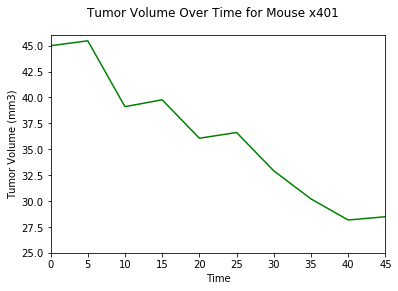

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Set variable to a Mouse ID
mouse = "x401"

# Create series of tumor volumes from merged_data DF where 'Mouse ID' equals the 'mouse' variable using loc()
tumor_mouse = merged_data.loc[merged_data["Mouse ID"] == mouse, ["Tumor Volume (mm3)"]]

# Create series of timepoints from merged_data DF where 'Mouse ID' equals the 'mouse' variable using loc()
time = merged_data.loc[merged_data["Mouse ID"] == mouse, ["Timepoint"]]

# Plot a line graph using matplotlib, with time as the x axis and tumor volume as the y axis, and format
plt.plot(time, tumor_mouse,'g')
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

# Make descriptive graph title using the the 'mouse' variable 
plt.suptitle(f"Tumor Volume Over Time for Mouse {mouse}")

# Set x axis limit
plt.xlim(0,45)
plt.ylim(25,46)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

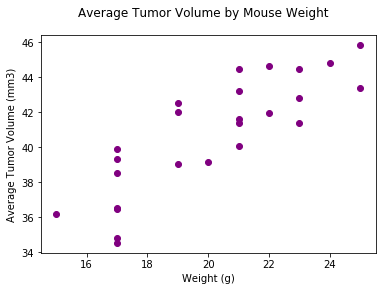

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create DF from merged_data where the 'Drug Regimen' is  'Capomulin'
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Create a series of average tumor volume by grouping the new DF by 'Mouse ID' and running the mean() function 
tumor_means = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Sort the index of the new series
tumor_means = tumor_means.sort_index()

# Create another DF using unique Mouse IDs 
weight = capomulin.drop_duplicates(subset=["Mouse ID"], keep='first')

# Create second series by pulling the weight information for each individual mouse
weight = weight.set_index("Mouse ID")["Weight (g)"]

# Sort this index as well to align the both series
weight = weight.sort_index()

# Generate scatter plot with matplotlib, using 'weight' and 'tumor_means' as x and y respectively, and format
plt.scatter(weight,tumor_means,color='purple')
plt.suptitle("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation is 0.84


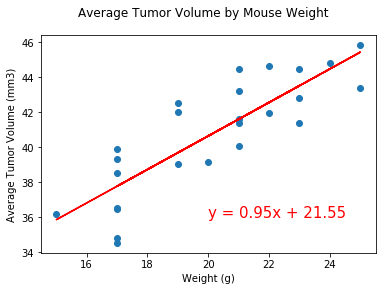

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Using scipy.stats' pearsonr() function, calculate the scatter plot's correlation and display
correlation = st.pearsonr(weight,tumor_means)
print(f'The correlation is {round(correlation[0],2)}')

# Use scipy.stats' linregress() function and set output to variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_means)

# Calcualte linear regression and set 'lineeq' variable for annotation
regress_values = weight * slope + intercept
lineeq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(weight,tumor_means)

# Plot the regress line 
plt.plot(weight,regress_values,"r-")

# Add lineeq as annotation and format graph
plt.annotate(lineeq,(20,36),color='red',fontsize=15)
plt.suptitle("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()